# Оптимизация для обучения нейронной сети

## Введение

Глубокие нейронные сети обучаются **изучением** набора весов. Оптимальные веса определяются путем **минимизации функции потерь** для нейронной сети. Эта минимизация выполняется с использованием **алгоритма оптимизации**. Таким образом, алгоритмы оптимизации являются важным компонентом в вашем наборе инструментов нейронной сети.

В этом уроке вы познакомитесь с основными алгоритмами оптимизации, используемыми для обучения глубоких нейронных сетей, а также с их подводными камнями. Нелинейная природа нейронных сетей приводит к нескольким серьезным проблемам с локальными градиентами. В результате множественных нелинейностей локальный градиент может проявлять сложное поведение. Кроме того, локальный градиент может сильно отличаться от более масштабного глобального поведения градиента функции потерь.

Высокая размерность задач оптимизации обучения нейронной сети делает детальное понимание поведения оптимизации чрезвычайно трудным. Для каждого веса модели (параметра) существует одно измерение. Таким образом, оптимизация выполняется на нелинейной поверхности с миллионами измерений. Несмотря на несколько десятилетий исследований, значительная часть прогресса была основана на эмпирическом опыте, а не на теории.


### Локальная сходимость алгоритмов оптимизации

В идеальном случае задача минимизации - **дугообразная**. Под дугой мы подразумеваем, что градиент всегда указывает в направлении **глобального минимума** функции потерь. К сожалению, с проблемами нелинейной оптимизации, такими как обучение нейронной сети, нет никакой гарантии, что проблема минимизации является дугообразной. Кроме того, функция потерь может иметь несколько **локальных минимумов**.

Несмотря на вышесказанное, минимум функции потерь будет, по крайней мере, локально дугообразным. Чтобы понять поведение функции потерь около минимума, мы можем расширить ее как ряд Тейлора второго порядка изменения весов от шага оптимизации $l$ до $l + 1$:

$$J(W^{(l+1)}) = J(W^{(l)}) + (W^{(l+1)} - W^{(l)})\vec{g} + \frac{1}{2}(W^{(l+1)} - W^{(l)})^T H (W^{(l+1)} - W^{(l)}) $$

где,   
$W^{(l)}$ тензор весов на шаге $l$,  
$\vec{g}$ вектор градиента,  
$H$ является **гессенской** матрицей. 

Гессиан является матрицей частных производных второго порядка. Вы можете думать о гессиане как о скорости изменения градиента или градиента градиента. Для вектора градиента $f(\vec{x})$ гессиан равен:

$$H \big(f(\vec{x}) \big) = \begin{bmatrix}
  \frac{\partial^2 f(\vec{x})}{\partial x^2_1} & 
  \frac{\partial^2 f(\vec{x})}{\partial x_2 \partial x_1} & 
  \cdots & 
  \frac{\partial^2 f(\vec{x})}{\partial x_n \partial x_1}\\
   \frac{\partial^2 f(\vec{x})}{\partial x_1 \partial x_2} &
   \frac{\partial^2 f(\vec{x})}{\partial x^2_2} & 
   \cdots &
   \frac{\partial^2 f(\vec{x})}{\partial x_1 \partial x_n}\\
   \vdots & \vdots & \vdots & \vdots \\
   \frac{\partial^2 f(\vec{x})}{\partial x_1 \partial x_n} &
   \frac{\partial^2 f(\vec{x})}{\partial x_2 \partial x_n} & 
   \cdots &
   \frac{\partial^2 f(\vec{x})}{\partial x^2_n} 
 \end{bmatrix}$$
 
Гессиан имеет несколько полезных свойств. 

- Гессиан симметричен, так как $\frac{\partial^2 f(\vec{x})}{\partial x_1 \partial x_2} = \frac{\partial^2 f(\vec{x})}{\partial x_2 \partial x_1}$.
- Если все собственные значения гессиана положительны, кривизна градиента направлена вверх, что указывает на минимальную точку в $f(\vec{x})$. Оптимизация дугообразна, по крайней мере локально. В этом случае мы говорим, что гессиан **положительно определен**.
- Если все собственные значения гессиана отрицательны, кривизна градиента нисходящая, указывая и максимальную точку в $f(\vec{x})$. В этом случае мы говорим, что гессиан **отрицательно определен**.
- Гессиан со смешанными собственными значениями знака указывает градиент с кривизной вверх в некоторых измерениях и кривизной вниз в других измерениях. Эта ситуация со смешанной кривизной называется **седловой точкой**.
- Для гауссовского процесса гессиан является обратной ковариационной матрицей. 

Для размера шага $\alpha$ мы можем переписать первое уравнение следующим образом:

$$J(W^{(l)}- \alpha \vec{g}) = J(W^{(l)}) - \alpha \vec{g}^T \vec{g} + \frac{1}{2} \alpha^2 \vec{g}^T H \vec{g}$$

Минимальная точка $J(W^{(l)}- \alpha \vec{g})$ возникает там, где градиент равен нулю во всех измерениях. Это видно из того, что в этой точке:
$$J(W^{(l)}) = J(W^{(l)}- \alpha \vec{g})$$ 

С этой точки дальнейшее снижение функции потерь невозможно. Оптимальный размер шага для квадратичного приближения равен: 

$$\alpha^* = \frac{\vec{g}^T \vec{g}}{\vec{g}^T H \vec{g}}$$

Но что произойдет, если гессиан плохо себя ведет? Одним из показателей «поведения» для гессиана является **число условий**:

$$\kappa(H) = \frac{|\lambda_{max}(H)|}{|\lambda_{min}(H)|}$$

где,  
$|\lambda_{max}(H)|$ является абсолютным значением наибольшего собственного значения H.  
$|\lambda_{min}(H)|$ является абсолютным значением наименьшего собственного значения H.   

Число условий гессиана имеет серьезные последствия для скорости сходимости алгоритмов оптимизации. Если число условий мало, гессиан хорошо обусловлен и градиент имеет одинаковый масштаб во всех измерениях. Эта ситуация приводит к быстрой конвергенции. Число идеальных условий близко к 1.

Однако, если гессиан **плохо обусловлен**, имея большое число условий, масштаб градиента будет совершенно разным в разных измерениях. Алгоритм оптимизации будет быстро сходиться вдоль направлений собственных векторов, соответствующих большим собственным значениям. Однако сходимость будет медленной по направлению собственных векторов с малыми собственными значениями. Эта ситуация была описана как медленно блуждающая вниз по длинной узкой долине. Фактически, для реальных стохастических задач (например, зашумленных данных) алгоритм оптимизации может вообще не сходиться вдоль некоторых направлений собственных векторов!

### Функция мультимодальных потерь и глобальная оптимизация

Нелинейная природа скрытых слоев может привести к функции потерь со значительной локальной структурой в пространстве большого размера. Учитывая эту сложность, вполне возможно, что существуют локальный минимум, локальный максимум или седловые точки. В общем, нет никакой гарантии, что глобальный минимум целевой функции когда-либо будет найден.

В первые дни исследований нейронных сетей, как правило, считалось, что минимизация функции потерь «застревает» в локальных минимальных или седловых точках. Однако недавний опыт показывает, что это может быть не так. Во многих реальных случаях функция потери обучения продолжает уменьшаться с эпохами. Если бы алгоритм оптимизации застрял, это было бы не так. 

Продолжение схождения процесса оптимизации не означает, что схождение будет быстрым. Опыт показывает, что медленная конвергенция является распространенной проблемой. Такая ситуация возникает, когда гессиан функции потерь плохо обусловлен.

### Исчезающие и взрывающиеся градиенты

Некоторыми распространенными недостатками функций потери глубоких нейронных сетей являются **исчезающие градиенты** и **взрывные градиенты**. Исчезающие градиенты возникают, когда в обратном распространении встречается несколько небольших градиентов. Взрывные градиенты возникают, когда в функции потерь встречаются быстрые изменения в функции потерь, иногда называемые **крутыми обрывами**.

Глубокая линейная модель может помочь в понимании исчезающих градиентов. В этой простой модели каждый слой имеет одинаковые веса, представленные тензором $W$. Мы можем вычислить разложение по собственным значениям по собственным векторам $W$:

$$W = Q \Lambda Q^T$$   
где,   
$Q$ унитарная матрица собственных векторов,   
$\Lambda$ диагональная матрица собственных значений. 

На n-м уровне сигнал, поступающий в верхнюю часть сети, будет взвешиваться с $W^n$, который мы можем записать:

$$W^n = \big( Q \Lambda Q^T \big)^n = Q \Lambda^n Q^T$$

Чтобы иметь устойчивую сеть, все собственные значения должны быть меньше 1. Поэтому $\Lambda^T$ является диагональной матрицей исчезающих чисел при увеличении $n$. Чистый эффект состоит в том, что градиенты из глубины сети могут быть экспоненциально меньше, чем из поверхностных слоев. Когда применяется обратное распространение, градиент фактически исчезает в направлении 0.

Взрывные градиенты возникают из-за внезапных изменений кривизны функции потерь. Обнаружение этих «обрывов» приводит к тому, что алгоритм градиентного спуска пересекает минимальную точку, иногда на крайнюю величину. Гессиан представляет кривизну функции потерь или скорость изменения градиента. Собственное разложение гессиана:

$$H(J(W)) = Q \Lambda Q^T = Q diag(\lambda) Q^T$$

Рассмотрим, что происходит, когда функция потерь имеет высокую локальную кривизну. На одном шаге оптимизации все собственные значения $diag(\lambda)$ малы и ведут себя хорошо. У гессиана есть небольшое число условий. На следующем шаге собственные значения могут стать огромными (намного больше 1), так как кривизна функции потерь изменяется так быстро. Поскольку только некоторые собственные значения становятся большими, число условий становится чрезвычайно большим. Это приводит к взрывному градиенту!

К счастью, существует простое решение проблемы взрыва градиента, это **отсечение градиента**. Как следует из названия, отсечение градиента - не более чем наложение жесткого максимального ограничения на градиент. На практике этот простой алгоритм оказался весьма эффективным.

***
**Примечание:** Все оптимизаторы в Keras имеют параметры для обрезания отдельных весов или нормы градиента.
***

### Плоские пятна

С комплексной функцией потерь мы обычно имеем области, которые являются **плоскими**. Эти часто называют **плато**. Другими словами, области с незначительным уклоном. Эти регионы могут привести к очень медленному обучению. Есть несколько решений для этой проблемы. Скорость обучения может быть увеличена или может быть использован импульс. 

****
**Примечание:** Keras имеет функцию обратного вызова, которую можно использовать для принятия мер при медленном обучении.
****

## Пакетный градиентный спуск для обратного распространения

Напомним, что мы обучаем нейронные сети с использованием алгоритма **обратного распространения**. Алгоритм обратного распространения требует нескольких компонентов:

1. Функция **потери**, чтобы измерить, насколько хорошо наше представление соответствует функции, которую мы пытаемся изучить.
2. Метод распространения изменений в представлении (весах) через сложную сеть. Для этого мы будем использовать **цепное правило исчисления** для вычисления **градиентов** представления. В общем случае этот процесс требует использования методов автоматического дифференцирования.
3. **Алгоритм оптимизации**, который использует градиенты, чтобы минимизировать функцию потерь.

Алгоритм обратного распространения находит оптимальные веса для нейронной сети, предпринимая небольшие шаги в направлении **локального градиента**. Под *локальным градиентом* мы понимаем градиент $J(W)$, рассчитанный для каждого набора весов $W$ по мере выполнения алгоритма.

Получив градиент функции потерь, мы можем обновить тензор весов, используя приведенную ниже формулу.

$$W_{t+1} = W_t + \alpha \nabla_{W} J(W_t) $$  
где  
$W_t = $ тензор весов или параметров модели на шаге $t$.   
$\alpha\ = $ размер шага или скорость обучения.  
$J(W) = $ функция потерь с учетом весов.  
$\nabla_{W} J(W) = $ градиент $J$ относительно весов $W$.  

Должно быть очевидно, что алгоритм обратного распространения является формой градиентного спуска. Веса обновляются небольшими шагами, следуя локальному градиенту $J(W)$ вниз по склону. При **условии завершения** $J(W)$ должно быть на уровне или очень близко к минимально возможному значению. 



### Пример расчета

Основная идея проста, но на самом деле оптимизация сложной нейронной сети - это совсем другое дело. Чтобы продемонстрировать концепцию, мы будем работать над очень простой двумерной задачей. Функция потерь в этом случае является среднеквадратичной ошибкой (MSE). Таким образом, по сути, минимальное MSE совпадает с решением по максимальной вероятности (MLE).

Функция потерь для гауссовского процесса:

$$J(\hat{x}) = \frac{1}{N} \sum_{i = 1}^{N} \big( \vec{x}_i - \hat{x} \big)^2$$  

где;  
$x = $ данные выборки, которая в этом случае является двумерным тензором размерности $N x 2$, где $N$ - количество выборок,    
$\hat{x} = $ вектор средних, которые мы хотим оценить.  

Мы можем вычислить градиент для каждого измерения следующим образом:

$$\frac{ \partial \hat{x}}{ \partial x_j} = \frac{2}{N} \sum_{i = 1}^{N} \big(  x_{ij} - \tilde{x}_j \big)$$  

где,  
$x_j = $ j-е измерение $\vec{x}$,   
$x_{ij} = $ i-й компонент j-го измерения $\vec{x}$,   
$\tilde{x}_i = $ текущая оценка i-го компонента $\hat{x}$. 


Выполните код в ячейке ниже, чтобы загрузить пакеты, необходимые для выполнения остальной части этой записной книжки.

In [1]:
import keras
from keras.datasets import mnist
import keras.utils.np_utils as ku
import keras.models as models
import keras.layers as layers
from keras import regularizers
from keras.layers import Dropout
from keras import optimizers
import numpy as np
import numpy.random as nr
from tensorflow import set_random_seed
import numpy.linalg as nll
import sklearn.model_selection as ms
import time
import matplotlib.pyplot as plt
import math

%matplotlib inline

Using TensorFlow backend.


Код в ячейке ниже имитирует двумерное нормальное распределение с высокой ковариацией между двумя измерениями. Выполните этот код.

In [2]:
cov = np.array([[1.0, 0.99], [0.99, 1.0]])
mean = np.array([1.0, 2.0])

nr.seed(9911)
sample = nr.multivariate_normal(mean, cov, 1000)
sample.shape

(1000, 2)

Как уже упоминалось, для гауссовского процесса ковариационная матрица является обратной к гессиану. Это означает, что обе матрицы имеют одинаковое число условия. Код в ячейке ниже вычисляет и отображает собственные значения ковариационной матрицы и число условия. 
Число условия - это отношение наибольшего к наименьшему сингулярному значению в разложении сингулярного значения матрицы. База логарифма представляет собой оценку того, сколько базовых цифр потеряно при решении линейной системы с этой матрицей. Другими словами, число условия оценивает потерю точности.
Выполните этот код и проверьте результат.

In [3]:
eigenvalues = nll.eig(cov)[0]
print('Eigenvalues = ' + str(eigenvalues))
print('The condition number = ' + str(eigenvalues[0]/eigenvalues[1]))

Eigenvalues = [1.99 0.01]
The condition number = 198.99999999999983


Ковариационная матрица имеет большое число условия. Эта задача оптимизации намеренно напрягает алгоритмы.

****
**Примечание:** В реальной задаче это число условия может быть улучшено простым масштабированием Z-Score. Однако для демонстрации мы пропустим этот шаг.
****

Затем выполните код в ячейке ниже, чтобы отобразить смоделированные данные и проверить результат. 

Text(0.5, 1.0, 'Sample data')

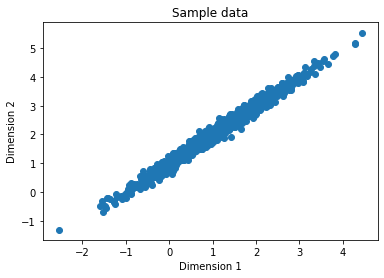

In [4]:
plt.scatter(sample[:,0], sample[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Sample data')

С подготовленными смоделированными данными пришло время попробовать градиентный спуск! Код в ячейке ниже реализует основной **алгоритм пакетного градиентного спуска**. Этот алгоритм считается пакетным градиентным спуском, поскольку все случаи используются для вычисления каждого обновления градиента.

Работа выполняется в цикле while. Условием завершения является норма l2 градиента, которая меньше установленного значения или выполнено максимальное число итераций. Скорость обучения фиксируется для каждого шага оптимизации. В конце выводится массив, который дает историю пути оптимизатора.

Выполните этот код и проверьте результат.

In [5]:
def compute_gradient(x, estimate):
    mult = 2.0/x.shape[0]
    diff = np.subtract(x, estimate)    
    return mult * np.sum(diff, axis = 0)

def grad_descent(x, estimate, lr, stopping, max_its = 100):
    out = estimate
    out = out.reshape((1,2))
    err = 10000000.0 ## starting criteria for graident metric
    i = 1
    while(err > stopping and i < max_its):
        grad = compute_gradient(x, estimate)
        estimate = estimate + lr * grad
        out = np.append(out, estimate.reshape((1,2)))
        err = np.std(grad)
        i = i + 1
    out = out.reshape((i, 2))    
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    print('MLE = ' + str(out[i-1:]))
    return out

lr = 0.1
stopping = 0.01

start = np.array([0.0,0.0])
steps = grad_descent(sample, start, lr, stopping)

Number of iterations = 23
Final gradient value = 0.009207076752850306
MLE = [[1.03543747 2.02630507]]


Похоже, что оптимизатор приблизился к разумным значениям за небольшое количество шагов. MLE можно сравнить со значениями местоположения, используемыми в моделировании, $\{1.0, 2.0 \}$.

Затем выполните код в ячейке ниже, чтобы визуализировать траекторию, взятую оптимизатором. Красные точки на графике показывают решения, найденные на каждом этапе алгоритма градиентного спуска.

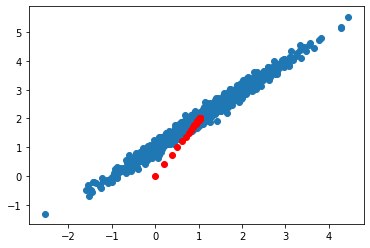

In [6]:
def plot_descent(x, steps):
    plt.scatter(x[:,0], x[:,1])
    plt.scatter(steps[:,0], steps[:,1], color = 'red')

plot_descent(sample, steps)    

Путь приближения выглядит хорошо. Вы можете видеть, что скорость сходимости каждого шага оптимизации уменьшается по мере приближения алгоритма к сходимости. Это ожидается, так как градиент уменьшается по мере схождения оптимизатора.

************************
**Упражнение 1:** Все алгоритмы градиентного спуска чувствительны к скорости обучения. Теперь вы исследуете эффект использования агрессивной или большой скорости обучения. В приведенной ниже ячейке создайте и выполните код, чтобы применить алгоритм градиентного спуска со скоростью обучения 0,9 и отобразить результат. Убедитесь, что вы установили `numpy.random` seed как 9777.

In [7]:
nr.seed(9777)



Далее вы попробуете очень небольшую скорость обучения. В приведенной ниже ячейке создайте и выполните код, чтобы применить алгоритм градиентного спуска со скоростью обучения 0,01. Используйте аргумент `max_its = 1000`, чтобы убедиться, что алгоритм сходится. Убедитесь, что вы установили numpy.random seed 8888.

Number of iterations = 230
Final gradient value = 0.009971885763135877
MLE = [[1.03292243 2.02138324]]


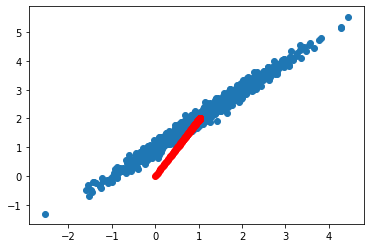

In [8]:
nr.seed(8888)

lr = 0.01
start = np.array([0.0,0.0])
steps = grad_descent(sample, start, lr, stopping, max_its = 1000)

plot_descent(sample, steps)   

Обратите внимание на различия в свойствах сходимости алгоритма пакетного градиентного спуска и сравните их с алгоритмом со скоростью обучения 0,1

## Стохастический градиентный спуск

Алгоритм **стохастического градиентного спуска (SGD)** (Немировши и Юдин, 1978) является рабочей лошадкой обучения глубоких нейронных сетей. В отличие от пакетного градиентного спуска SGD вычисляет ожидаемый градиент, используя **мини-партию** Бернулли, отобранную из полного набора случаев. Мини-пакетную оптимизацию часто называют **онлайн-оптимизацией**, поскольку алгоритм оптимизатора может обновлять решение по мере поступления случаев.

Основная идея стохастической оптимизации заключается в использовании случайной выборки Бернулли для оценки **ожидаемого значения** весов. Обновление веса для SGD тогда становится:

$$W_{t+1} = W_t + \alpha\ E_{\hat{p}data}\Big[ \nabla_{W} J(W_t) \Big]$$ 

где,  
$E_{\hat{p}data} \big[ \big]$ является ожидаемым значением градиента с учетом выборки Бернулли данных $\hat{p}data$.

Поскольку алгоритм SGD работает с мини-пакетами, он обладает высокой масштабируемостью по сравнению с пакетным градиентным спуском. Последний должен хранить все случаи в памяти.

Выбор размера партии может потребовать некоторой настройки. Если партия слишком мала, оценка градиента будет плохой. Кроме того, аппаратные ресурсы не будут использованы в полной мере. Большие партии требуют значительной памяти. Кроме того, большие партии могут замедлить вычисление каждого шага градиента.

Исходя из опыта SGD обладает хорошими свойствами сходимости. Такое поведение, по-видимому, возникает из-за того, что мини-пакетные выборки обеспечивают лучшее исследование пространства функции потерь. Представляется, что вариации градиента от одной мини-выборки к другой помогают алгоритму уйти от седловых точек или других областей функции потерь с плохими свойствами сходимости. Фактически, для очень больших наборов данных алгоритм SGD часто сходится до завершения первого прохода данных.

Псевдокод для алгоритма SGD:

`Random_sort(cases)
while(grad > stopping_criteria):
    mini-batch = sample_next_n(cases)
    grad = compute_expected_grad(mini_batch)
    weights = update_weights(weights, grad)`
 

### Пример базового SGD

Код в ячейке ниже реализует основной алгоритм SGD. Код практически идентичен функции пакетного градиентного спуска. Единственное отличие - это выборка Бернулли с использованием `numpy.random.choice`.

Выполните этот код и проверьте результат.

In [9]:
def sgd(x, estimate, lr, stopping, batch_size = 10, max_its = 100):
    out = estimate
    out = out.reshape((1,2))
    err = 10000000.0 #
    # starting criteria for graident metric
    i = 1
    indx = range(x.shape[0])
    while((err > stopping) and (i < max_its)):
        sample_idx = nr.choice(indx, batch_size)
        grad = compute_gradient(x[sample_idx,:], estimate)
        estimate = estimate + lr * grad
        out = np.append(out, estimate.reshape((1,2)))
        err = np.std(grad)
        i = i + 1
    out = out.reshape((i, 2))    
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    print('MLE = ' + str(out[i-1:]))
    return out

nr.seed(7788)
lr = 0.1
stopping = 0.01
#start = np.array([5.0,-1.0])
start = np.array([0.0,0.0])
steps = sgd(sample, start, lr, stopping)

Number of iterations = 26
Final gradient value = 0.002848331422155792
MLE = [[1.19717858 2.20736782]]


Алгоритм SGD сходится почти к тому же результату за то же количество шагов, что и алгоритм пакетного градиентного спуска. Использование мини-пакетов существенно не изменило результат.

Затем выполните код в ячейке ниже, чтобы визуализировать траекторию оптимизации. Красные точки на графике показывают решения, найденные с использованием каждой мини-партии на этапах алгоритма SGD.

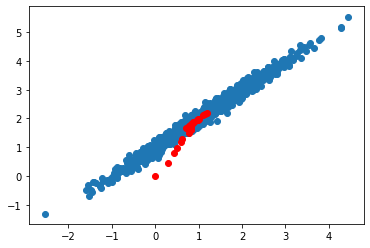

In [10]:
plot_descent(sample, steps)   

Сравните траекторию оптимизатора SGD с оптимизатором пакетного градиентного спуска. По-видимому, оптимизатор SGD сначала сходится быстрее, но затем кажется, что он начинает немного бродить возле точки схождения. Это имеет смысл, поскольку ожидаемый градиент от небольших мини-партий, вероятно, будет более шумным, чем градиент партии.

*********
**Упражнение 2:** Размер мини-пакета является гиперпараметром всех алгоритмов стохастического градиентного спуска. Выбор подходящего размера мини-пакета может повлиять как на сходимость, так и на производительность вычислений. Чтобы исследовать этот эффект, в приведенном ниже коде повторите расчет SGD, используя размер мини-пакета 1. Установите начальное значение `numpy.random` в 9944.

In [11]:
nr.seed(9944)


Сравните эти результаты с результатами с большим размером мини-партии. Обратите внимание, что различия незначительны, так как в целом SGD довольно нечувствителен к размеру мини-партии.

### Добавление импульса к SGD

С функцией потерь с плохим условием, SGD, как известно, движется «зигзагообразно» взад и вперед, когда оптимизатор движется к конвергенции. Эта проблема может быть серьезной в некоторых случаях, когда это приводит к многим потерянным шагам оптимизации, которые в лучшем случае обеспечивают лишь минимальное снижение функции потерь. Чтобы преодолеть эту проблему, в 1988 году в работе Rummelhart, et. al., предложил добавить термин **импульс** к обновлению градиента.

Напомним из ньютоновской механики, что $momentum = m \cdot v$, где $m$ - масса и

$v$ - скорость

Если предположить, что $m = 1$, то импульс равен скорости. Обновление веса модели становится взвешенной суммой скорости (импульса) и градиента:

$$v^{(l)} = momentum \cdot v^{(l - 1)} + lr \cdot \nabla_{W} J(W^{(l)})\\
W^{(l+1)} = W^{(l)} + v^{(l)}$$   
где,   
$v^{(l)}$ скорость на шаге $l$,    
$momentum$ множитель импульса,    
$lr$ это скорость обучения.   

Код в ячейке ниже реализует базовую версию алгоритма SGD с импульсом. Алгоритм идентичен обычному SGD за исключением обновления оценки веса.

Выполните этот код и проверьте результат.

In [12]:
def sgd_momentum(x, estimate, lr, stopping, momentum, batch_size = 8, max_its = 100):
    out = estimate
    out = out.reshape((1,2))
    v = np.zeros((1, x.shape[1]))
    err = 10000000.0 ## starting criteria for graident metric
    i = 1
    indx = range(x.shape[0])
    while((err > stopping) and (i < max_its)):
        sample_idx = nr.choice(indx, batch_size)
        grad = compute_gradient(x[sample_idx,:], estimate)
        v = momentum * v + lr * grad
        estimate = estimate + v
        out = np.append(out, estimate.reshape((1,2)))
        err = np.std(grad)
        i = i + 1
    out = out.reshape((i, 2))    
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    print('MLE = ' + str(out[i-1:]))
    return out

nr.seed(2288)
lr = 0.1
stopping = 0.01
#start = np.array([5.0,-1.0])
start = np.array([0.0,0.0])
momentum = 0.1
steps = sgd_momentum(sample, start, lr, stopping, momentum)

Number of iterations = 22
Final gradient value = 0.003724169662605553
MLE = [[1.0285908  2.03228354]]


Эти результаты практически идентичны результатам, полученным для основного алгоритма SGD. Учитывая дугообразный характер задачи, это не очень удивительно.

Теперь выполните приведенный ниже код, чтобы отобразить и изучить траекторию алгоритма оптимизации.

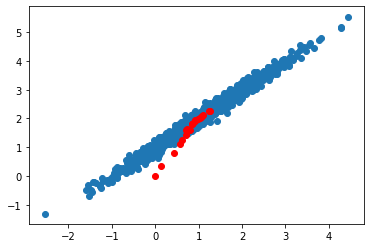

In [13]:
plot_descent(sample, steps)  

Этот результат в основном такой же, как и для основного алгоритма SGD.

### SGD с керасом

Keras имеет обширную библиотеку оптимизаторов, включая полнофункциональный метод SGD. На веб-сайте Keras имеется небольшая [документация по доступным оптимизаторам] (https://keras.io/optimizers/) со ссылками на некоторые алгоритмы.

В качестве первого шага, перед тем как опробовать оптимизатор Keras SGD, нам нужно создать набор тестовых и обучающих данных в виде массивов. Выполните код в ячейке ниже, который делает именно это.

In [14]:
indx = range(sample.shape[0])
nr.seed(9988)
set_random_seed(5566)
indx = ms.train_test_split(indx, test_size = 100)
x_train = np.ravel(sample[indx[0],[0]])
y_train = np.ravel(sample[indx[0],[0]])
x_test = np.ravel(sample[indx[1],[1]])
y_test = np.ravel(sample[indx[1],[1]])

С подготовленными данными мы можем приступить к обучению и тестированию модели нейронной сети с помощью оптимизатора SGD. Чтобы определить задачу, к которой можно применить нейронную сеть, мы решим задачу регрессии для смоделированных данных, которые мы использовали.

Оптимизатор SGD в Keras имеет ряд аргументов, в том числе:
- скорость обучения: `lr`,
- градиентное отсечение: `clipnorm`,
- скорость распада: `decay`,
- импульс: `momentum`.

Изучите код ниже для деталей. Выполните код и изучите результаты.


Execution time = 9.969053030014038


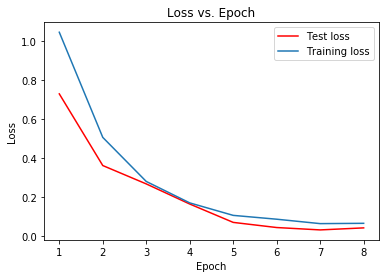

In [15]:
def plot_loss(history):
    '''Function to plot the loss vs. epoch'''
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Test loss')
    plt.plot(x, train_loss, label = 'Training loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epoch')
    plt.legend()


## First define the layers of the regression model. 
nn = models.Sequential()
nn.add(layers.Dense(128, activation = 'relu', input_shape = (1, ),
                        kernel_regularizer=regularizers.l2(0.01)))
nn.add(Dropout(0.5))
nn.add(layers.Dense(128, activation = 'relu',
                        kernel_regularizer=regularizers.l2(0.01)))
nn.add(layers.Dense(1))

## Define the SGD optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.5, nesterov=False)
## The optimizer is used at the compile stage
nn.compile(optimizer = sgd, loss = 'mse', metrics = ['mae'])

## Define the callback list
filepath = 'my_model_file.hdf5' # define where the model is saved
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor = 'val_loss', # Use accuracy to monitor the model
        patience = 1 # Stop after one step with lower accuracy
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = filepath, # file where the checkpoint is saved
        monitor = 'val_loss', # Don't overwrite the saved model unless val_loss is worse
        save_best_only = True # Only save model if it is the best
    )
]

## Now fit the model
nr.seed(7658)
set_random_seed(5555)
start = time.time() ## Get the system time at strat of execution
history = nn.fit(x_train, y_train, 
                  epochs = 40, batch_size = 1,
                  validation_data = (x_test, y_test),
                  callbacks = callbacks_list,  # Call backs argument here
                  verbose = 0)
end = time.time() ## Get the system time at the end of execution
## Execution time is the difference between the end and start times
print('Execution time = ' + str(end - start))

## Visualize the outcome
plot_loss(history)

Обратите внимание, что потеря обучения продолжает уменьшаться даже после увеличения потери теста. Это часто наблюдаемое поведение при обучении нейронных сетей. Оптимизатор продолжает сокращать потери при обучении, даже после того, как модель переобучена.

Мы должны проверить, что обученная модель действительно имеет смысл. Код в ячейке ниже прогнозирует значения для тестового набора данных, печатает среднеквадратическое значение и составляет результат. Выполните этот код и проверьте результат.

In [16]:
def plot_reg(x, y_score, y):
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    
    ## Get the data in plot order
    xy = sorted(zip(x,y_score))
    x = [x for x, _ in xy]
    y_score = [y for _, y in xy]

    ## Plot the result
    plt.plot(x, y_score, c = 'red')
    plt.scatter(x, y)


predicted = nn.predict(x_test)
plot_reg(x_test, predicted, y_test)
print(np.std(predicted - y_test))

1.3653445745616013


Эти результаты представляются разумными, учитывая данные.

Execution time = 2.5849769115448


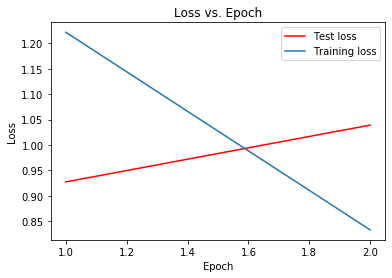

In [17]:
## First define the layers of the regression model. 
nn = models.Sequential()
nn.add(layers.Dense(128, activation = 'relu', input_shape = (1, ),
                        kernel_regularizer=regularizers.l2(0.01)))
nn.add(Dropout(0.5))
nn.add(layers.Dense(128, activation = 'relu',
                        kernel_regularizer=regularizers.l2(0.01)))
nn.add(layers.Dense(1))

## Define the SGD optimizer
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.005, nesterov=False)
## The optimizer is used at the compile stage
nn.compile(optimizer = sgd, loss = 'mse', metrics = ['mae'])


## Now fit the model
nr.seed(5555)
set_random_seed(5577)
start = time.time() ## Get the system time at strat of execution
history = nn.fit(x_train, y_train, 
                  epochs = 40, batch_size = 1,
                  validation_data = (x_test, y_test),
                  callbacks = callbacks_list,  # Call backs argument here
                  verbose = 0)
end = time.time() ## Get the system time at the end of execution
## Execution time is the difference between the end and start times
print('Execution time = ' + str(end - start))

## Visualize the outcome
plot_loss(history)

In [18]:
predicted = nn.predict(x_test)
plot_reg(x_test, predicted, y_test)
print(np.std(predicted - y_test))

1.2338266589510938


## Адаптивные алгоритмы градиентного спуска

До сих пор мы работали с алгоритмами с постоянной скоростью обучения. Во многих случаях градиент функции потерь будет меняться несколько раз до достижения сходимости. Например, градиент может уменьшиться, а затем снова увеличиться. В этих случаях постоянная скорость обучения приводит к медленной конвергенции. Существует несколько возможных подходов к изменению скорости обучения алгоритмов оптимизации.

Одним из простых подходов является использование **снижения скорости обучения**. Скорость обучения уменьшается от начального значения по мере оптимизации. Этот подход эффективен в тех случаях, когда градиент уменьшается довольно устойчиво по мере оптимизации. Более низкая скорость обучения снижает вероятность того, что алгоритм переиграет оптимальную точку, а затем начнет скитаться с медленной сходимостью. Мы видели это поведение в предыдущих примерах SGD.

Второй подход заключается в использовании алгоритмов с **адаптивной скоростью обучения**. Как следует из названия, алгоритмы адаптивной скорости обучения изменяют скорость сходимости в зависимости от градиента. В идеале, скорость обучения должна увеличиваться, когда встречаются плато и плохо обусловленные участки функции потери. Скорость обучения должна уменьшаться, когда градиент функции потерь ведет себя лучше. На практике эти идеалы трудно реализовать, и исследователи создали множество алгоритмов, использующих различные эвристические методы для адаптации скорости обучения.

### Пример адаптивного обучения, Адам

Алгоритм Адама (Kingma and Ba, 2014) использует довольно сложный набор эвристик для адаптации скорости обучения. Адам использует как импульс первого, так и второго порядка. Импульс второго порядка аналогичен кинетической энергии в ньютоновской механике. Кроме того, Адам включает экспоненциальный спад в обе меры импульса, чтобы гарантировать, что более свежие значения доминируют в обновлениях скорости обучения.

Код в ячейке ниже реализует базовую версию Adam. Изучите этот код, выполните его и проверьте результаты.

In [19]:
def adam(x, estimate, lr, stopping, momentum, ke, batch_size = 32, max_its = 1000):
    out = estimate
    out = out.reshape((1,2))
    s = np.zeros((1, x.shape[1]))
    r = np.zeros((1, x.shape[1]))
    grad_norm = 10000000.0 ## starting criteria for graident metric
    i = 1
    indx = range(x.shape[0])
    while((grad_norm > stopping) and (i < max_its)):
        sample_idx = nr.choice(indx, batch_size)
        grad = compute_gradient(x[sample_idx,:], estimate)
        s = momentum * s + (momentum - 1.0) * grad
        s_tilde = s/(1 - momentum**i)
        r = ke * r + (ke - 1.0) * np.multiply(grad, grad)
        r_tilde = np.sqrt(np.abs(r/(1 - ke**i)))
        delta = np.array([lr* ss/(rr + 0.000001) for ss, rr in zip(s_tilde, r_tilde)])
        estimate = estimate - delta 
        out = np.append(out, estimate.reshape((1,2)))
        grad_norm = np.std(grad) 
        i = i + 1
    out = out.reshape((i, 2))    
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    print('MLE = ' + str(out[i-1:]))
    return out

nr.seed(5789)
lr = 0.1
stopping = 0.01
#start = np.array([5.0,-1.0])
start = np.array([0.0,0.0])
momentum = 0.1
ke = 0.1
steps = adam(sample, start, lr, stopping, momentum, ke)

Number of iterations = 27
Final gradient value = 0.004249043573920475
MLE = [[1.26656719 2.25088661]]


Эти результаты не слишком отличаются от алгоритмов SGD.

Теперь выполните приведенный ниже код и изучите результаты.

In [20]:
plot_descent(sample, steps)  

 Траектория работы оптимизатора Adam значительно отличается от SGD. Обратите внимание, как траектория «зигзагообразна» в направлении схождения. Это, вероятно, результат плохих условий задачи.

***********
**Упражнение 3:** Необходимо определить значение так называемого гиперпараметра кинетической энергии. Чтобы изучить эффект изменения этого гиперпараметра, вы попробуете большее значение. В ячейке ниже создайте код для вычисления оптимизации и отобразите результаты, используя значение кинетической энергии 0,99. Установите семя `numpy.random` в 66789.

In [21]:
nr.seed(66789)


Обратите внимание на разницу в сходимости модели с двумя разными значениями параметра кинетической энергии.

### Адаптивная оптимизация с помощью Keras

Теперь давайте попробуем адаптивную оптимизацию с Keras. Мы будем использовать один из наиболее широко используемых адаптивных алгоритмов, RMSprop (Hinton, 2012). Как и Адам, RMSprop накапливает меру квадрата градиента, чтобы изменить скорость обучения. Экспоненциальный спад применяется к накопленному квадратному градиенту, чтобы гарантировать, что более поздний опыт доминирует в скорости обучения.

Изучите код ниже для деталей. Выполните код и изучите результаты.

Execution time = 2.990370273590088


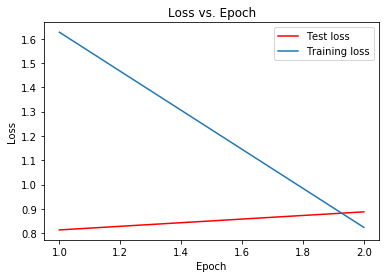

In [22]:
## First define the regression model. 
nn = models.Sequential()
nn.add(layers.Dense(128, activation = 'relu', input_shape = (1, ),
                        kernel_regularizer=regularizers.l2(1.0)))
nn.add(layers.Dense(128, activation = 'relu',
                        kernel_regularizer=regularizers.l2(1.0)))
nn.add(layers.Dense(1))

## Define the RMS optimizer
RMS = optimizers.RMSprop(lr=0.01)
nn.compile(optimizer = RMS, loss = 'mse', metrics = ['mae'])

## Now fit the model
nr.seed(9778)
start = time.time() # The time as execution start
history = nn.fit(x_train, y_train, 
                  epochs = 40, batch_size = 1,
                  validation_data = (x_test, y_test),
                  callbacks = callbacks_list,  # Call backs argument here
                  verbose = 0)
end = time.time() # Time at execution endf
print('Execution time = ' + str(end - start))

## Visualize the outcome
plot_loss(history)

Notice that RMSprop converges in fewer epochs than SGD for this situation. The same type of over-fitting of the model is also evident. 

Once again, we should check that the learned model actually makes sense. The code in the cell below predicts score values for the test dataset, prints the RMSE and plots the result. Execute this code and examine the outcome. 

In [23]:
predicted = nn.predict(x_test)
plot_reg(x_test, predicted, y_test)
print(np.std(predicted - y_test))

1.2305098757887842


This result is similar to the one achieved with SGD, but perhaps a bit better and faster. 

## 5.0 Weight initial values

When training deep neural networks the initial values chosen for the weights can have a significant effect on the results. If weights are all set to the same initial value several possible problems will arise:
- Some of the weights may be linearly dependent. In this case, some weights will change together during training and not be correctly learned. 
- Some weights will become **stuck** at the initial value and are never learned. This is special case of the first problem, for the most part. 

Fortunately, the solution to this problem is simple; **randomize** the starting values of the weights.  This process is sometimes referred to as adding **fuzz** to the initial weights. A number of schemes have been tried. For example, initial weight values can be drawn from a Gaussian or Normal distribution. In practice, drawing the initial values from a Uniform distribution works as well as any other scheme.    

## 6.0 Image Classification with Keras

Now, it is your turn to construct and evaluate an image classifier using the Adam optimizer in Keras. 

The code in the cell below loads and imports the data set, along with defining one of the performance evaluation charts. Execute this code.  

In [24]:
from keras.optimizers import Adam
from keras.datasets import mnist
from keras.layers import Dropout

def plot_accuracy(history):
    train_acc = history.history['acc']
    test_acc = history.history['val_acc']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'test accuracy')
    plt.plot(x, train_acc, label = 'training accuracy')  
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. Epoch')  
    plt.legend(loc='lower right')
   

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28*28)).astype('float32')/255
train_labels = ku.to_categorical(train_labels)
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255
test_labels = ku.to_categorical(test_labels)

In the cell below, you will create the code to construct a Keras with the following specification:

1. Set a `numpy.random` seed of 5577.
2. Set a Tensorflow random seed 7799 with the `set_random_seed` function.
2. Define a sequential model.
3. Add a dense hidden layer with 512 units, using ReLU activation. Remember to define the input shape. 
4. Add a 0.5 `Dropout` layer.
5. Add a dense hidden layer with 512 units, using ReLU activation, and l2 regularization with parameter of 10.0. 
6. Add an output layer with 10 units (one for each digit category) and softmax activation. 
7. Print a summary of your model. 
8. Define an optimizer object using the Adam optimizer, with `decay = 0.005`. This argument determines the rate of change of the learning rate.
9. Compile your model using the optimizer object, `categorical_crossentropy` for the loss and `accuracy` as the metric. 
10. Fit the model using 20 `epochs` and a `batch_size` of 128. Save the results to a history object. Don't forget to include the `validation_data`. 

*****************
**Hint:** Refer to the Introduction to Keras lab for some examples of creating, executing and evaluating Keras models. 

*********************
**Note:** You can find detailed documentation for the [Keras Adam optimizer here.](https://keras.io/optimizers/).

In [25]:
nr.seed(5577)
set_random_seed(7799)



Compare these results the ones you obtained from the regularized model with the `rmsprop` optimizer in the Introduction to Keras lab. 

In the cell below create and execute the code to plot the loss history for the training of your neural network model. 

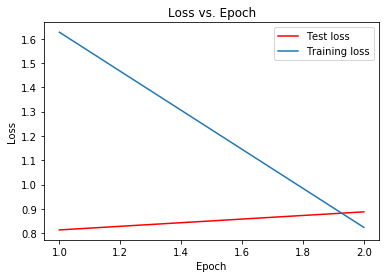

In [26]:
plot_loss(history)

Finally, in the cell below, create and execute the code to plot the accuracy history from training your neural network model. 

In [27]:
plot_accuracy(history) 

KeyError: 'acc'

Examine the results from training your model and compare them to those you obtained from the regularized model using the `rmsprop` optimizer in the Introduction to Keras lab. 

Also, note the slow convergence of this model. We have limited the training to 20 epochs in the interest of limiting computing time. It is likely that many more epochs are required to complete the training. 